<h1 style="color:green" align='center'> Data Science Regression Project: Predicting Home Prices in Bangalore </h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

import warnings
warnings.filterwarnings('ignore')

<h2 style='color:blue'>1. Data Load: Load Bangalore home price into a dataframe:</h2>

In [2]:
df = pd.read_csv("./../datasets/bengaluru_house_prices.csv")
print(df.shape)
df.head(3)

(13320, 9)


area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00

#### **Check for null values in the dataframe for each column.**

In [3]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

#### **Drop features/columns that are not required to build our model and assign it into the new dataframe df1.**

In [5]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df1.head(3)

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00

<h2 style='color:blue'>2. Data Clearning and Handling: </h2>

#### **Check the null value after dropping/removing some features.**

In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df1.shape

(13320, 5)

#### **Drop all the null values as we have big dataset it will not affect the outcome much.**

In [8]:
df2 = df1.dropna()
df2.shape

(13246, 5)

#### **Check for null values after new dataframe df2 just to make sure there are none.**

In [9]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

<h2 style='color: blue'>3. Feature Engineering(1):</h2>

In [10]:
df2.head(3)

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00

**Check the unique value of feature 'size'.**

In [11]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#### **Add new features called 'bhk'(bed hall kitchen). Split the feature 'size' into two and take the first value which is the number we want.**

**"2 BHK".split(" ") will split the categorical value '2 BHK'into [2, 'BHK'] but we want the first value so "2 BHK".split(" ")[0] will return only 2.**


In [12]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head(3)

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3

**Drop size feature from the dataframe.**

In [13]:
df3 = df2.drop('size', axis=1)
df3.head(3)

location total_sqft  bath   price  bhk
0  Electronic City Phase II       1056   2.0   39.07    2
1          Chikka Tirupathi       2600   5.0  120.00    4
2               Uttarahalli       1440   2.0   62.00    3

In [14]:
df3.shape

(13246, 5)

**Now check the values of bhk to confirm it's only numerical as we expect.**

In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

**Explore total_sqft. feature by checking if all the values are float type or not by using a user defined function.**

In [16]:
def is_float(data):
    try:
        float(data)
        return True
    except: 
        return False

**Check the total rows where the total_sqft features values are float.**

In [17]:
df3[df['total_sqft'].apply(is_float)].shape

(13056, 5)

**Explore the rows where total_sqft features values are not float and how to dealt with it.**

In [18]:
df3[~df['total_sqft'].apply(is_float)].head(10)

location      total_sqft  bath    price  bhk
30            Yelahanka     2100 - 2850   4.0  186.000    4
122              Hebbal     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar     1042 - 1105   2.0   54.005    2
165            Sarjapur     1145 - 1340   2.0   43.490    2
188            KR Puram     1015 - 1540   2.0   56.800    2
410             Kengeri  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road     1195 - 1440   2.0   63.770    2
648             Arekere       4125Perch   9.0  265.000    9
661           Yelahanka     1120 - 1145   2.0   48.130    2
672        Bettahalsoor     3090 - 5002   4.0  445.000    4

**Transform the range value such as '2100-2980' to a single value by taking means and drop the rest by working around through user define function.
'2000-2100'.split('-') will return ['2000', '2100']**

In [19]:
def range_to_mean(data):
    ret_val = data.split('-')
    if len(ret_val) == 2:
        return (float(ret_val[0])+float(ret_val[1]))/2
    try: 
        return float(data)
    except:
        return None
    

In [20]:
df4 = df3.copy()

In [21]:
df4['total_sqft'] = df4['total_sqft'].apply(range_to_mean)
df4['total_sqft'].values

array([1056., 2600., 1440., ..., 1141., 4689.,  550.])

In [22]:
df4.shape

(13246, 5)

**There are some elements from df4['total_sqft'] features that are NaN, we will remove those.**

In [23]:
df4 = df4[df4['total_sqft'].notnull()]
df4.shape

(13200, 5)

In [24]:
df4.loc[30, ['total_sqft']]

total_sqft    2475.0
Name: 30, dtype: object

In [25]:
df4.loc[30, 'total_sqft']

2475.0

<h2 style='color: blue'> 3. Feature Engineering(2):</h2>

**Add new feature called 'price_per_sqft' to check analyze the price of an apartment per square feet.**

In [26]:
df5 = df4.copy()

df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']
df5.head(10)

location  total_sqft  bath   price  bhk  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000
5                Whitefield      1170.0   2.0   38.00    2     3247.863248
6          Old Airport Road      2732.0   4.0  204.00    4     7467.057101
7              Rajaji Nagar      3300.0   4.0  600.00    4    18181.818182
8              Marathahalli      1310.0   3.0   63.25    3     4828.244275
9              Gandhi Bazar      1020.0   6.0  370.00    6    36274.509804

**Analyze price_per_sqft through statistical result.**

In [27]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

**Strip or trim all the white spaces or blanks that may be present at the end and beginning of the value of location feature**

In [28]:
df6 = df5.copy()
df6['location'] = df5['location'].apply(lambda x: x.strip())

**Examine the location feature, which is a categorical value or variable. We will need to apply dimensionality reduction technique to reduce the number of location name if it is very large**

In [29]:
location_stats = df6['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

**Exploring the total numbers of unique location name we have**

In [30]:
location_stats.values.sum()

13200

In [31]:
print(type(location_stats))
len(location_stats)

<class 'pandas.core.series.Series'>


1287

In [32]:
print(len(location_stats[location_stats <=10]))
print(len(location_stats[location_stats >10]))

1047
240


In [33]:
location_stats_less_than_11 = location_stats[location_stats<=10]
print(len(location_stats_less_than_11))
location_stats_less_than_11

1047


location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

<h2 style='color: blue'>3. Feature Engineering (Dimensionality Reduction): </h2>

**Any location having less than 10 data points should be tagged as 'other' location. This way number of categories can be reduced by huge amount. Later on when we apply 'one hot encoding', we will have fewer dummy variables.**

In [34]:
df7 = df6.copy()
df7.shape

(13200, 6)

In [35]:
df6.head()

location  total_sqft  bath   price  bhk  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000

In [36]:
df7['location'] = df6['location'].apply(lambda x: 'others' if x in location_stats_less_than_11 else x)

In [37]:
len(df7.location.unique())

241

<h2 style='color:blue'>4. Outlier Removal (Business Logic):</h2>

**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [38]:
df7[(df7['total_sqft']/df7['bhk'])<300].head()

location  total_sqft  bath  price  bhk  price_per_sqft
9                others      1020.0   6.0  370.0    6    36274.509804
45           HSR Layout       600.0   9.0  200.0    8    33333.333333
58        Murugeshpalya      1407.0   4.0  150.0    6    10660.980810
68  Devarachikkanahalli      1350.0   7.0   85.0    8     6296.296296
70               others       500.0   3.0  100.0    3    20000.000000

**From above table we saw that 'bhk' with 8 have 'total_sqft' value 1350 but 'bhk' with 6 have 'total_sqft' 1407 which is larger than 8 'bhk'. This shouldn't be the case so they are taken as error and have to be remove.**

In [39]:
df8 = df7[(df7['total_sqft']/df7['bhk']) >= 300]
print(df8.shape)
df8.head()

(12456, 6)


location  total_sqft  bath   price  bhk  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000

<h2 style='color:blue'>4. Outlier Removal (Standard Deviation and Mean):</h2>

In [40]:
df8.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**From above statistical result we learn that there is a wide variation between minimum and maximum value which can be due to outliers present in the dataset. We need to remove those outlier using standard deviationa and mean.**

In [41]:
len(df8[(df8.price_per_sqft > (df8.price_per_sqft.mean()+df8.price_per_sqft.std()))])

1122

In [42]:
len(df8[(df8.price_per_sqft < (df8.price_per_sqft.mean() - df8.price_per_sqft.std()))])

40

In [43]:
def removed_pp_sqft_outlier(df):
    new_df = pd.DataFrame()
    for _, loc_df in df.groupby('location'):
        avg = np.average(loc_df.price_per_sqft)
        stdev = np.std(loc_df.price_per_sqft)
        reduced_df = loc_df[(loc_df.price_per_sqft > (avg - stdev)) & (loc_df.price_per_sqft <= (avg + stdev))]
        new_df = pd.concat([new_df, reduced_df], ignore_index=True)
    return new_df
        

In [44]:
df9 = removed_pp_sqft_outlier(df8)
print(df9.shape)
df9.head()

(10242, 6)


location  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668

**Explore for a given location what does the 2bhk and 3bhk plot looks like.**

In [45]:
def scatter_plot(df, loc):
    bhk2 = df[(df.location==loc) & (df.bhk==2)]
    bhk3 = df[(df.location==loc) & (df.bhk==3)]
    l1 = plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', s=60)
    l2 = plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='+', s=60)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (Lakh)')
    plt.title(loc)
    plt.legend([l1, l2],['2 BHK', '3 BHK'])
    plt.show()

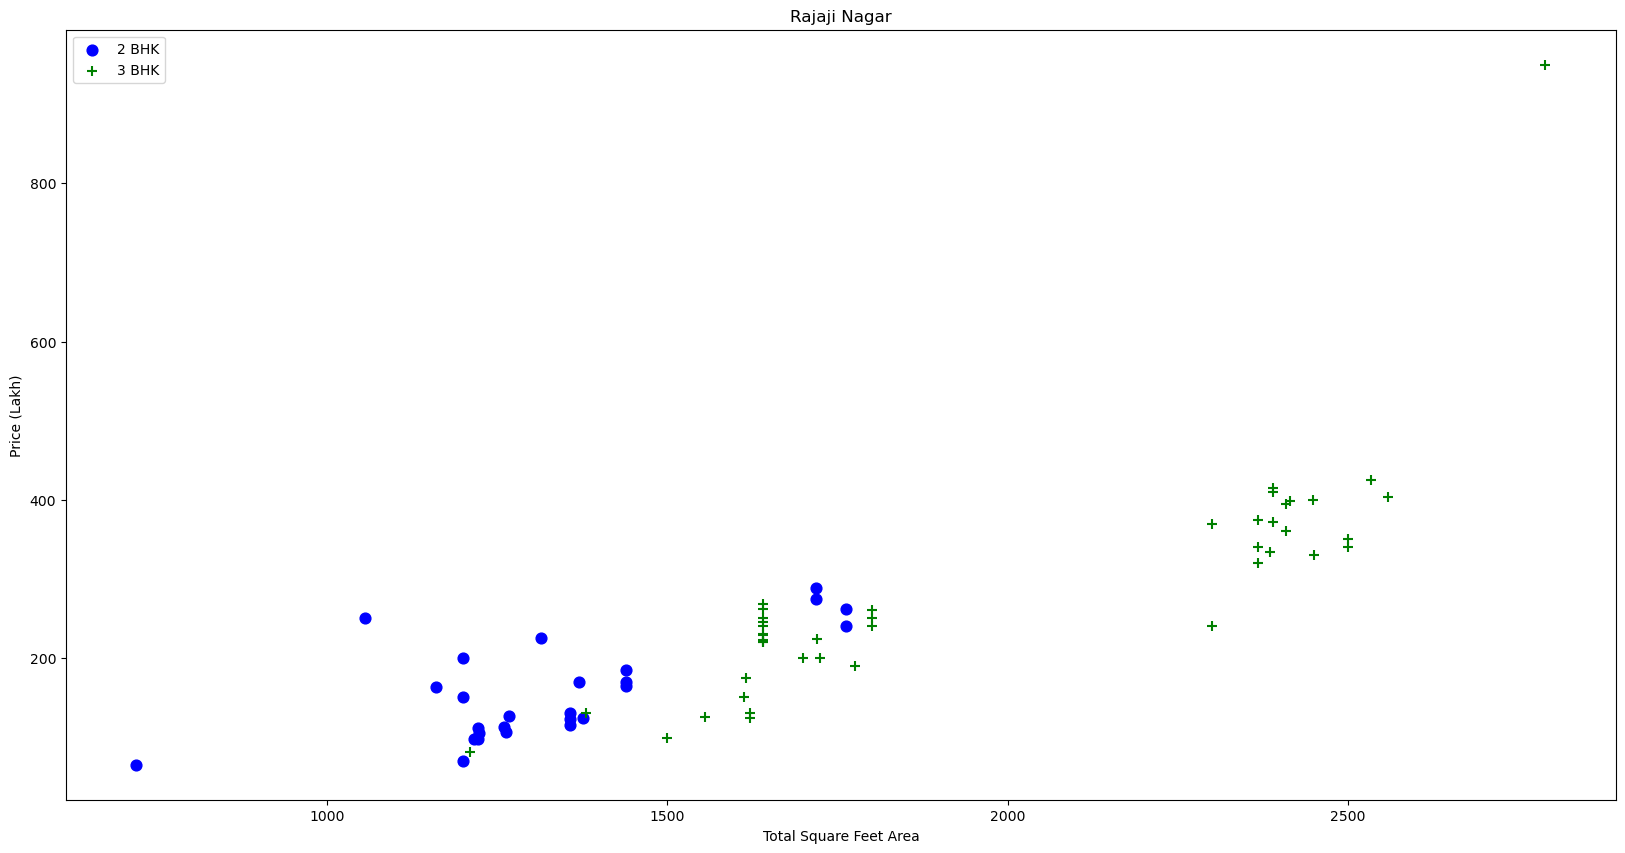

In [46]:
scatter_plot(df8, 'Rajaji Nagar')

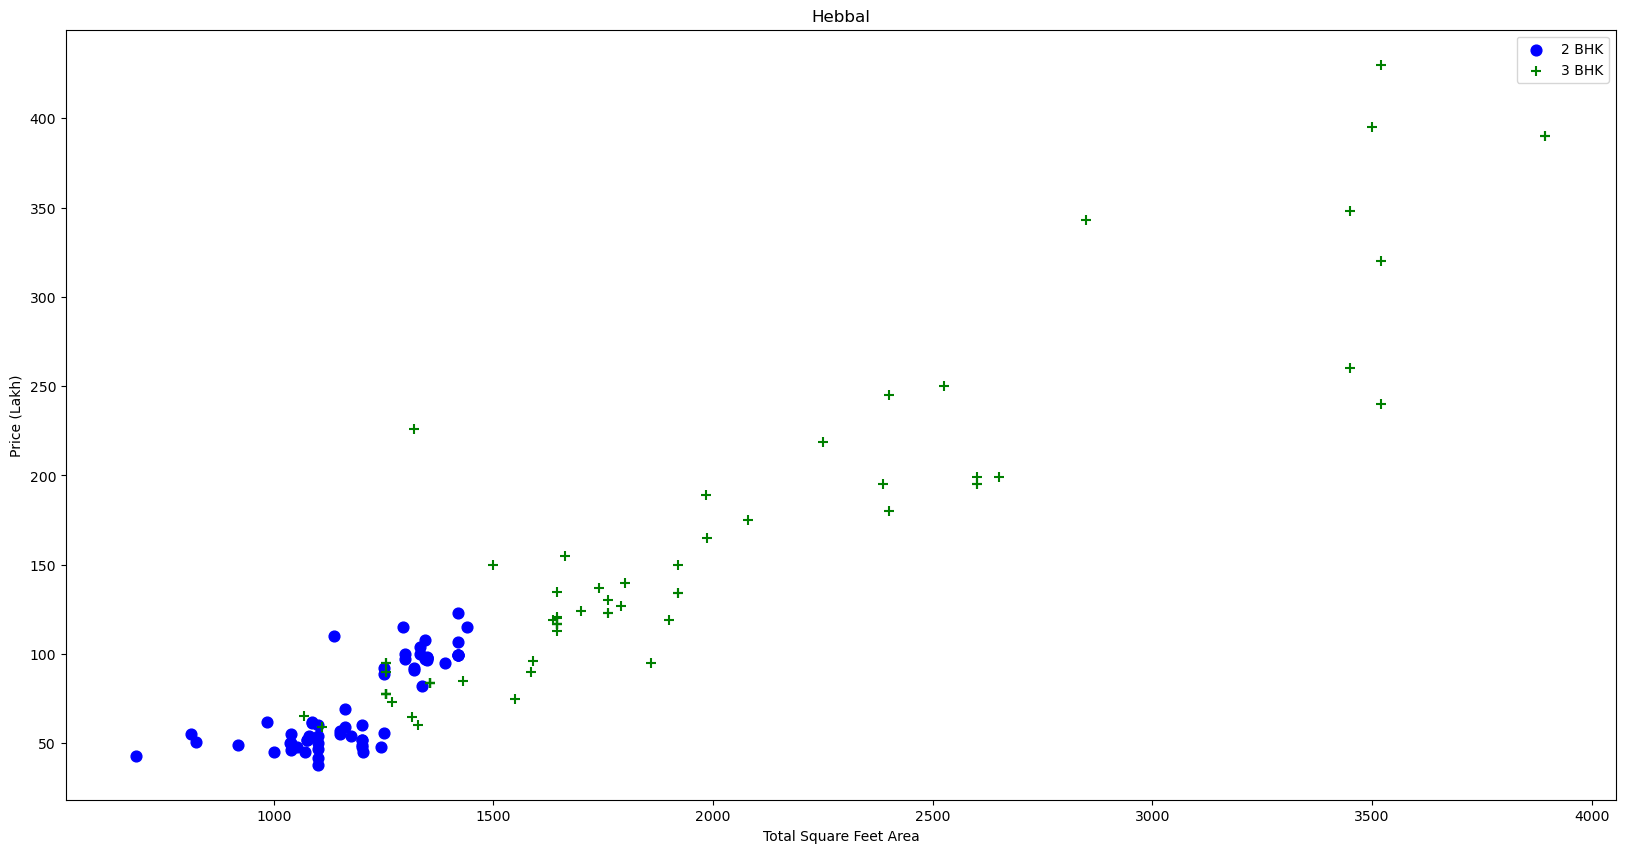

In [47]:
scatter_plot(df8, 'Hebbal')

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**`

In [48]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for _, loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'avg': np.average(bhk_df.price_per_sqft),
                'stdev': np.std(bhk_df.price_per_sqft),
                'count': len(bhk_df)
            }
            
        for bhk, bhk_df in loc_df.groupby('bhk'):
            stat = bhk_stats.get(bhk-1)
            if stat and stat['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft <(stat['avg'])].index.values)
    return df.drop(exclude_indices, axis='index')
            

In [49]:
df10 = remove_bhk_outlier(df9)
print(df10.shape)
df10.head()

(7317, 6)


location  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

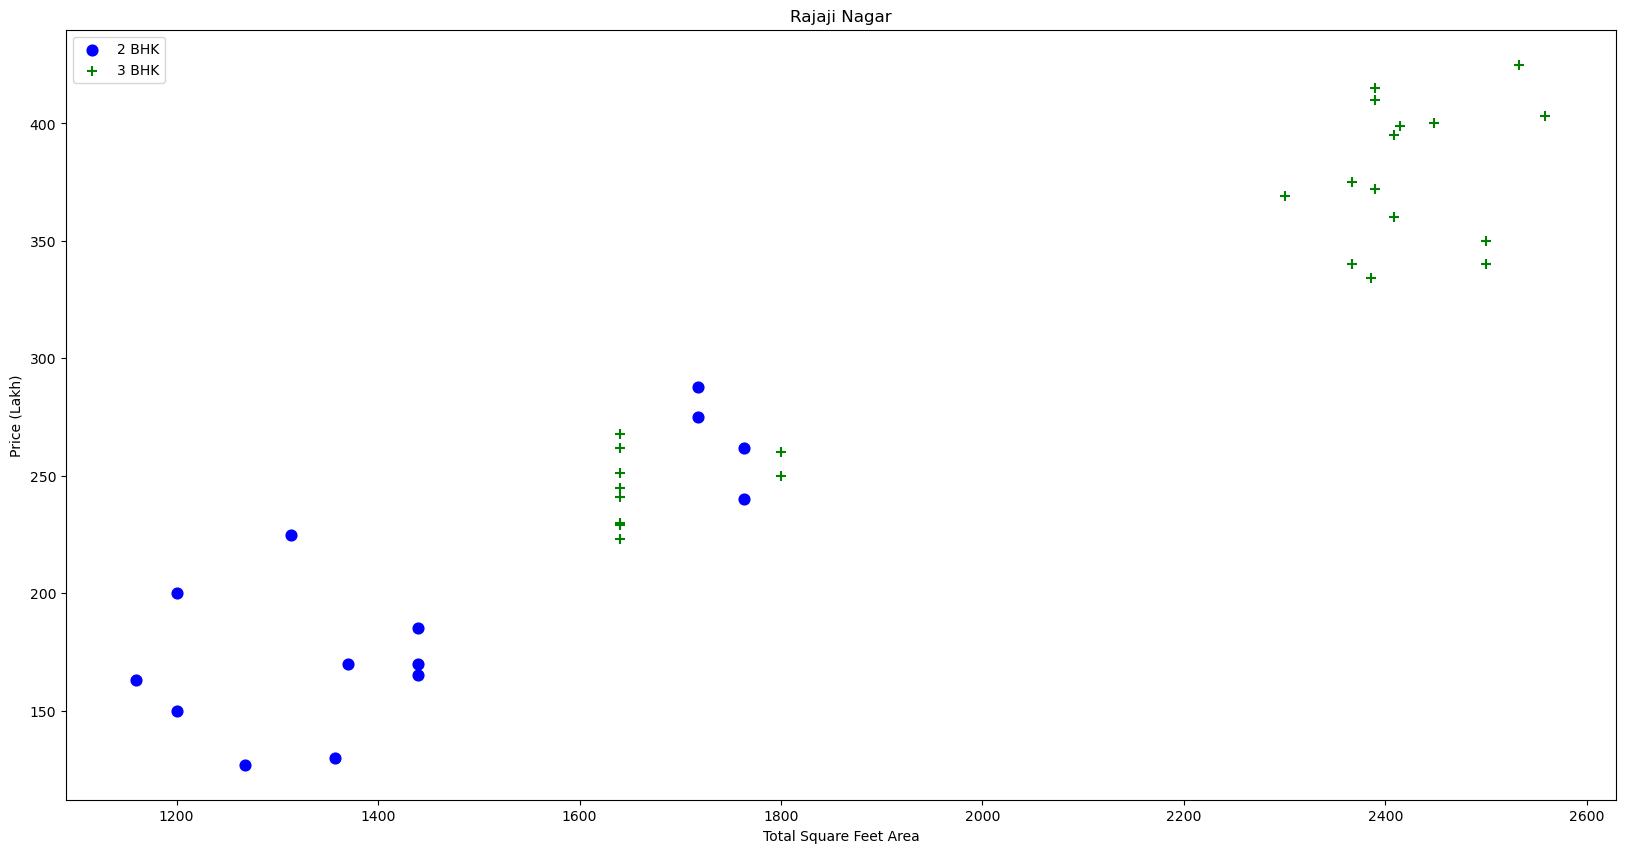

In [50]:
scatter_plot(df10, 'Rajaji Nagar')

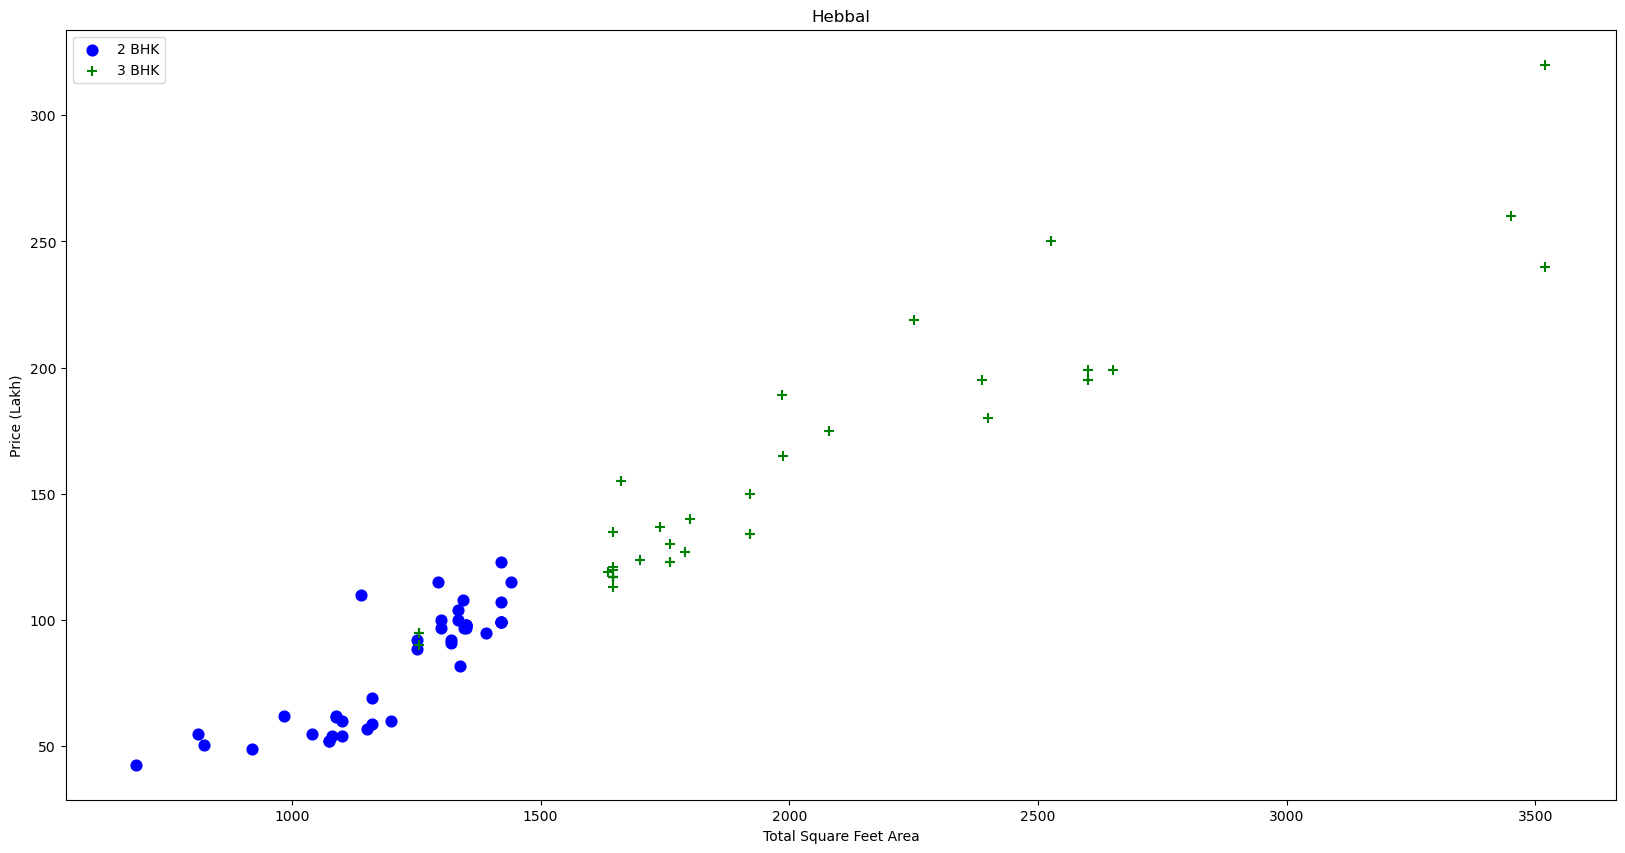

In [51]:
scatter_plot(df10, 'Hebbal')

**Explore the dataset where bathroom is more than 10.**

In [59]:
df10[df10.bath>10]

location  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar      4000.0  12.0  160.0   10     4000.000000
8483          others     12000.0  12.0  525.0   10     4375.000000
8572          others     10000.0  16.0  550.0   16     5500.000000
9306          others      6000.0  12.0  150.0   11     2500.000000
9637          others      5425.0  13.0  275.0   13     5069.124424

**Show and Check if there are dataset that have bathroom more than the bedroom by specific number.**

In [61]:
df10[df10.bath >(df10.bhk+2)]

location  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      1806.0   6.0   116.0    3     6423.034330
8408         others     11338.0   9.0  1000.0    6     8819.897689

**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.**

In [63]:
df11 = df10[df10.bath < (df10.bhk+2)]
print(df11.shape)
df11.head()

(7239, 6)


location  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668

In [64]:
df12 = df11.drop(['price_per_sqft'], axis='columns')
print(df12.shape)
df12.head()

(7239, 5)


location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

<h2 style='color:blue'>5. OneHotEncoding For Location Feature</h2>

In [66]:
dummies = pd.get_dummies(df12.location, dtype=int)
print(dummies.shape)
dummies.head(3)

(7239, 241)


1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  others  
0            0             0       0  
1            0             0       0  
2            0             0       0  

[3 rows x 241 columns]

**axis=value**

```
    axis=1 is equivalent to axis='columns' 
    while axis=0 is equivalent to axis='rows' or axis='index'
```

In [68]:
df13 = pd.concat([df12, dummies.drop('others', axis=1)], axis=1)
print(df13.shape)
df13.head(3)

(7239, 245)


location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  

[3 rows x 245 columns]

In [70]:
df14 = df13.drop('location', axis=1)
df14.head(3)

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   
2      1875.0   2.0  235.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  

[3 rows x 244 columns]

<h2 style='color:blue'>6. Model Building</h2>

In [71]:
df14.shape

(7239, 244)

**Split the dataset into independent ie `X` and dependent or target variable ie `y`.**


In [119]:
X = df14.drop('price', axis='columns')
print(X.shape)
X[:2]

(7239, 243)


total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  

[2 rows x 243 columns]

In [120]:
y = df14.price
print(y.shape)
y[:3]

(7239,)


0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [121]:
print(len(X))
print(len(y))

7239
7239


**Split the X and y into Training and Testing dataset.**

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [133]:
print(len(X_train), X_train.shape)
print(len(X_test), X_test.shape)

5791 (5791, 243)
1448 (1448, 243)


In [134]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8629132245229441

<h2 style='color: blue'>7. Use KFold Validation to measure accuracy of our LinearRegression model</h2>

In [139]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>8. GridSearchCV for finding the best model</h2>

In [140]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params':{
            'fit_intercept':[True, False],
            'n_jobs':[None,-1,1,2,3,4]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree' : {
    'model': DecisionTreeRegressor(),
    'params': {
        'criterion': ['squared_error', 'friedman_mse'],  # Updated 'mse' to 'squared_error'
        'splitter': ['best', 'random']
        }
    }
}

In [143]:
def find_best_model_using_GridSearchCV(Xs,ys, algo):
    scores = []
    cvs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, algo_dic in algo.items():
        gsc = GridSearchCV(algo_dic['model'], algo_dic['params'], cv=cv, return_train_score=False)
        gsc.fit(Xs,ys)
        scores.append({
            'model': algo_name,
            'best_score': gsc.best_score_,
            'best_params': gsc.best_params_
        })
    return pd.DataFrame(scores)

In [144]:
find_best_model_using_GridSearchCV(X,y,algos)

model  best_score  \
0  linear_regression    0.847951   
1              lasso    0.726778   
2      decision_tree    0.713948   

                                         best_params  
0           {'fit_intercept': False, 'n_jobs': None}  
1                {'alpha': 2, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'be...

<h2 style='color:blue'>9. Test the model for few properties</h2>

In [172]:
def predict_price(loc, sqfts, baths, bhks):
    loc_index = np.where(X.columns==loc)[0][0]
    
    xs = np.zeros(len(X.columns))
    xs[0] = sqfts
    xs[1] = baths
    xs[2] = bhks
    if loc_index >=0:
        xs[loc_index] = 1
    return model.predict([xs])[0]  
# model.predict([xs]) return array([83.86570258])
#model.predict([xs])[0] return  83.86570258                                

In [173]:
predict_price('1st Phase JP Nagar', 1000, 2,2)

83.86570258312618

In [175]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

86.08062284987396

In [176]:
predict_price('Indira Nagar',1000, 2, 2)

193.31197733180005

In [177]:
predict_price('Indira Nagar',1000, 3, 3)

195.5268975985478

<h2 style='color:blue'>10. Save Model Using pickle library</h2>

In [187]:
import pickle
with open('bangalore_home_price_prediction', 'wb') as f:
    pickle.dump(model, f)

<h2 style='color:blue'>11. Export location and column information to a file that will be useful later on in our prediction application¶</h2>

In [188]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as g:
    g.write(json.dumps(columns))

In [189]:
np.array(X.columns)

array(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'B